# LSTM Neural Network Fitting Analysis

## Preamble

The aim of this analysis is to develop a pipeline that consists of a LSTM Neural Network (LSTM NN) that given the opening stock price of a stock over the previous 40 days, can accurately predict the current opening stock price.  This project was inspired by the work done by Yacoub Ahmed that can be found here https://towardsdatascience.com/getting-rich-quick-with-machine-learning-and-stock-market-predictions-696802da94fe.  The aim is while using his original LSTM NN as a starting point, is to improve it and then leverage it to create a simulation of some stock trading on a few automobile stocks.  In the interest of academic honesty, it must be noted that while we took our inspiration from Yacoub and used his original LSTM model.  All other code used here is original.

Note, in call cases where we train a LSTM NN, we have commented it out and replaced it with code that loads in the models from memory.  This is done to save the markers time from having to retrain the models.  Which I certainly do not recommend unless you have a GPU at your disposal.

In [1]:
# Reading in neccessary packages
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from project_functions.analysis_functions import plot, mse, transform, saveModel, loadModel, modelTraining

# This package only neccessary if you would like to re-download the data int the nexyt
# import yahoo_finance as yf

In [2]:
# object = yf.Ticker('F')
# data = object.history(start="2000-01-01", end="2020-11-17")
# data.to_csv('Data/Raw Data/forward.csv')
data = pd.read_csv('Data/Raw Data/forward.csv', index_col='Date')

## Check for Reasonable Predictor

To begin, we will build our model on Ford stock from January 1st, 2000 to November 17, 2020 (The day I am creating this).  Lets first as a formality check that the daily opening stock price is actually correlated to the previous days opening stock price.  To check this, we will create a plot of the sample correlation (ACF) below.  If we examine the AF plot below, we can clearly see that the opening price is highly correlated to the previous days opening stock price.  We can actually see this continues for many lags k.  Of course the reader may be wondering what we mean by lag k?  Let the opening stock price of ford be represented by the time series process ${Y_t}$.  The current days opening stock price we are interested in can be denated as $Y_t$.  Then in the plot below we can a high correlation between $Y_t$ and $Y_{t-k}$ where k is some integer k that denotes some number of units back in time.  For instance, from the plot below we can see that the sample ACF between $Y_t$ and $Y_{t-2}$ produces a sample ACF very close to 1.  Moving on, our conclusion from this plot is simply that the current opening stock price of Ford has a high correlation with its past opening stock prices.  Thus, it could be a strong predictor.  Lastly, the question remains how far back in the past to predict the current opening stock price.  That is many many past days should we use to predict the current day.  To choose this we arbitrarilty chose 4.

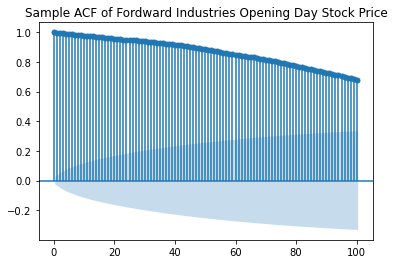

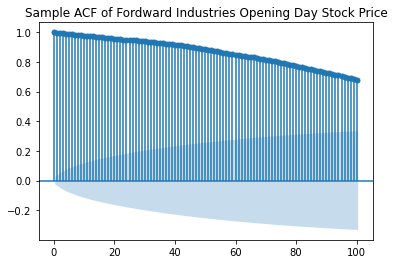

In [3]:
# CITATION: https://medium.com/@krzysztofdrelczuk/acf-autocorrelation-function-simple-explanation-with-python-example-492484c32711
plot_acf(data['Open'], lags=100, title='Sample ACF of Fordward Industries Opening Day Stock Price')

# NOTE: for some reason this produces 2 of the same plot, it could not be removed.

## Set Up Code

The following few cells contain code that will be use to create, and evaluate the models

In [4]:
# This defines the numpy of days in the past we will use to predict the current price
LAG = 40

In [5]:
# Using the transform function defined in project_functions-analysis_fiunctions.py to transform the data into the required form
xTrain, yTrain, xTest, yTest, scaler = transform(data, LAG)

## Model Training

### Model Tuning 1: Batch Size

Using our model as defined above, we explore the affect of batch sizes using of 10, 32(Default), 100, 500, 1000, 1500, and 2000.  All with a standard of 1000 epochs.

In [6]:
# batches = pd.DataFrame(columns=['batchSize', 'mseTrain','mseTest'])
# for batchSize in [10,32 ,100, 500, 1000, 1500, 2000, 2500, 3000]:
#     model = modelTraining(2000, batchSize, xTrain,yTrain)
#     mseTrain, yHat, y = mse(xTrain,yTrain, model, scaler)
#     mseTest, yHat, y = mse(xTest,yTest, model, scaler)
#     batches = batches.append({'batchSize':batchSize, 'mseTrain': mseTrain, 'mseTest':mseTest}, ignore_index=True)

#     saveModel(model, f"fordBatchTraining{batchSize}", location='Data')

# batches.to_csv('Data/fordBatchTraining.csv')
   
results = pd.read_csv('Data/Model Training Results/forwardBatchTraining.csv')
results
    


,batchSize,mseTrain,mseTest
0,10,0.053750,0.007168
1,32,0.069077,0.006059
2,100,0.096221,0.005149
3,500,0.135626,0.013121
4,1000,0.181391,0.006829
5,1500,0.246180,0.010500
6,2000,0.363314,0.035387
7,2500,0.421914,0.046237
8,3000,0.215748,0.005812


Looking at the above results of changing the batch size, we see mixed results with the potential that our predictions get worse as we increase the batch size.  We can see this as the MSof the training data does appear to increase as our batch size increases.  To verify the results, lets plot the results of the models with a batch size 10, 2000 and 3000 respectively.

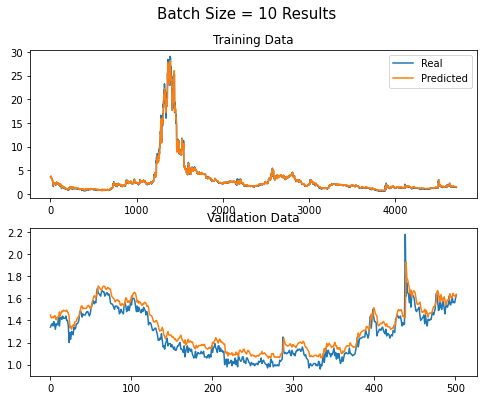

In [10]:
model = loadModel(name='forwardBatchTraining10', location = 'Data/Test Models')

# CITATION: https://riptutorial.com/matplotlib/example/11257/grid-of-subplots-using-subplot
meanSquared, yHat, y = mse(xTrain,yTrain, model, scaler)
fig, axes = plt.subplots(2, figsize=(8, 6))

# Set the title for the figure
fig.suptitle('Batch Size = 10 Results', fontsize=15)

# Top Left Subplot
axes[0].plot(y)
axes[0].plot(yHat)
axes[0].set_title("Training Data")
axes[0].legend(['Real', 'Predicted'])

meanSquared, yHat, y = mse(xTest,yTest, model, scaler)
# Top Right Subplot
axes[1].plot(y)
axes[1].plot(yHat)
axes[1].set_title("Validation Data")

plt.show()

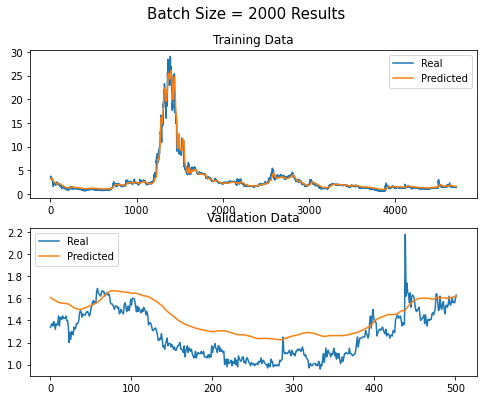

In [8]:
model = loadModel(name='forwardBatchTraining2000', location = 'Data/Test Models')
# CITATION: https://riptutorial.com/matplotlib/example/11257/grid-of-subplots-using-subplot
meanSquared, yHat, y = mse(xTrain,yTrain, model, scaler)
fig, axes = plt.subplots(2, figsize=(8, 6))

# Set the title for the figure
fig.suptitle('Batch Size = 2000 Results', fontsize=15)

# Top Left Subplot
axes[0].plot(y)
axes[0].plot(yHat)
axes[0].set_title("Training Data")
axes[0].legend(['Real', 'Predicted'])

meanSquared, yHat, y = mse(xTest,yTest, model, scaler)
# Top Right Subplot
axes[1].plot(y)
axes[1].plot(yHat)
axes[1].set_title("Validation Data")
axes[1].legend(['Real', 'Predicted'])

Text(0.5, 1.0, 'Validation Data')

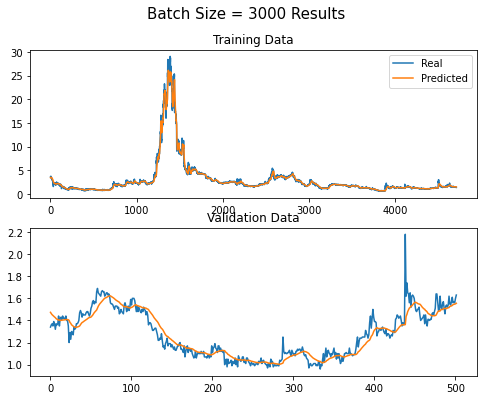

In [9]:
model = loadModel(name='forwardBatchTraining3000', location = 'Data/Test Models')
# CITATION: https://riptutorial.com/matplotlib/example/11257/grid-of-subplots-using-subplot
meanSquared, yHat, y = mse(xTrain,yTrain, model, scaler)
fig, axes = plt.subplots(2, figsize=(8, 6))

# Set the title for the figure
fig.suptitle('Batch Size = 3000 Results', fontsize=15)

# Top Left Subplot
axes[0].plot(y)
axes[0].plot(yHat)
axes[0].set_title("Training Data")
axes[0].legend(['Real', 'Predicted'])

meanSquared, yHat, y = mse(xTest,yTest, model, scaler)
# Top Right Subplot
axes[1].plot(y)
axes[1].plot(yHat)
axes[1].set_title("Validation Data")

We can clearly see that as the batch sizes increases, the fit of the model on the testing data worsens significantly.  This is particularly interesting for the batch size = 3000 where the testing MSE is actually quite good, but the training MSE is poor.  Ultimatly, we conclude that a smaller batch size is best.

### Model Tuning 2: Epochs

To achieve a better fit, we will now try to tune the number of epochs the model must iterate through to train the model.  To do so we will try epochs of 50, 100, 500, 1000, 2000, and 3000.  Using our results from tuning the batch size, we will use a constant batch size of 10.

In [10]:
# batches = pd.DataFrame(columns=['epochs', 'mseTrain','mseTest'])
# for epoch in [50,100, 500, 1000, 2000, 3000]:
#     model = modelTraining(epoch, 10, xTrain, yTrain)
#     mseTrain, yHat, y = mse(xTrain,yTrain, xTrain,yTrain)
#     mseTest, yHat, y = mse(xTest,yTest, xTrain,yTrain)
#     batches = batches.append({'epochs':epoch, 'mseTrain': mseTrain, 'mseTest':mseTest}, ignore_index=True)

#     saveModel(model, f"forwardEpochTraining{epoch}", location='Data/Test Models')

# batches.to_csv('Data/Model Training Results/forwardEpochTraining.csv')

results = pd.read_csv('Data/Model Training Results/forwardEpochTraining.csv')
results
    

,epochs,mseTrain,mseTest
0,50,0.914686,0.362143
1,100,0.267374,0.044504
2,500,0.128154,0.052861
3,1000,0.054909,0.003233
4,2000,0.026806,0.004708
5,3000,0.139692,0.008902


Looking at the results of increasing the number of epochs in our model, we can clearly see that increasing it reduces the MSE of both the training and test data.  However, we can see that after 1000 epochs the decreases dimish and in fact increases for the epoch=3000.  To investigate further, lets plots the results.

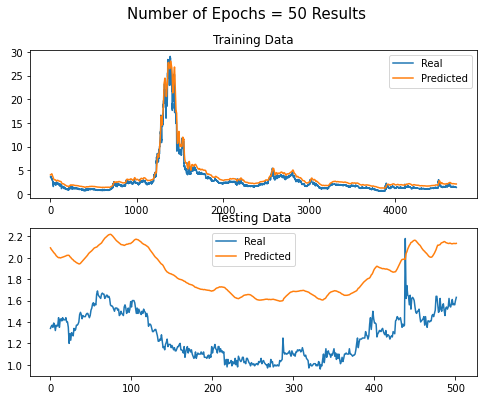

In [11]:
model = loadModel(name='forwardEpochTraining50', location = 'Data/Test Models')
# CITATION: https://riptutorial.com/matplotlib/example/11257/grid-of-subplots-using-subplot
meanSquared, yHat, y = mse(xTrain,yTrain, model, scaler)
fig, axes = plt.subplots(2, figsize=(8, 6))

# Set the title for the figure
fig.suptitle('Number of Epochs = 50 Results', fontsize=15)

# Top Left Subplot
axes[0].plot(y)
axes[0].plot(yHat)
axes[0].set_title("Training Data")
axes[0].legend(['Real', 'Predicted'])

meanSquared, yHat, y = mse(xTest,yTest, model, scaler)
# Top Right Subplot
axes[1].plot(y)
axes[1].plot(yHat)
axes[1].set_title("Testing Data")
axes[1].legend(['Real', 'Predicted'])

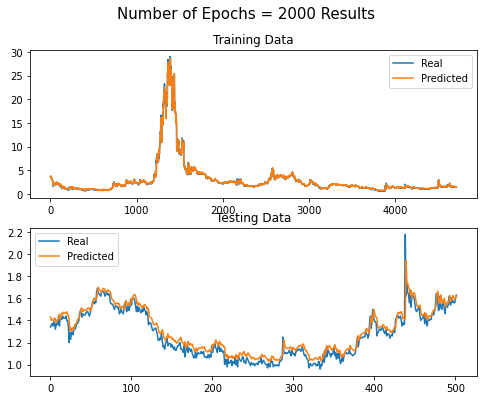

In [12]:
model = loadModel(name='forwardEpochTraining2000', location = 'Data/Test Models')
# CITATION: https://riptutorial.com/matplotlib/example/11257/grid-of-subplots-using-subplot
meanSquared, yHat, y = mse(xTrain,yTrain, model, scaler)
fig, axes = plt.subplots(2, figsize=(8, 6))

# Set the title for the figure
fig.suptitle('Number of Epochs = 2000 Results', fontsize=15)

# Top Left Subplot
axes[0].plot(y)
axes[0].plot(yHat)
axes[0].set_title("Training Data")
axes[0].legend(['Real', 'Predicted'])

meanSquared, yHat, y = mse(xTest,yTest, model, scaler)
# Top Right Subplot
axes[1].plot(y)
axes[1].plot(yHat)
axes[1].set_title("Testing Data")
axes[1].legend(['Real', 'Predicted'])

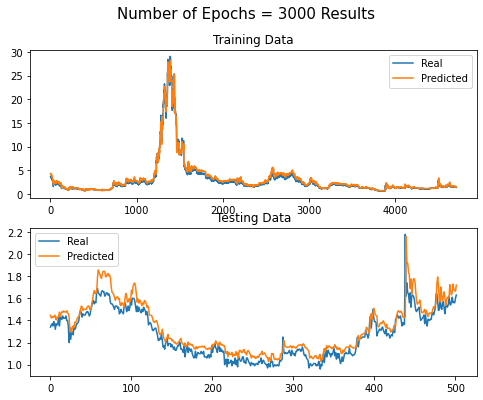

In [13]:
model = loadModel(name='forwardEpochTraining3000', location = 'Data/Test Models')
# CITATION: https://riptutorial.com/matplotlib/example/11257/grid-of-subplots-using-subplot
meanSquared, yHat, y = mse(xTrain,yTrain, model, scaler)
fig, axes = plt.subplots(2, figsize=(8, 6))

# Set the title for the figure
fig.suptitle('Number of Epochs = 3000 Results', fontsize=15)

# Top Left Subplot
axes[0].plot(y)
axes[0].plot(yHat)
axes[0].set_title("Training Data")
axes[0].legend(['Real', 'Predicted'])

meanSquared, yHat, y = mse(xTest,yTest, model, scaler)
# Top Right Subplot
axes[1].plot(y)
axes[1].plot(yHat)
axes[1].set_title("Testing Data")
axes[1].legend(['Real', 'Predicted'])

We can clearly see that for epochs=50, the model is far away from the test data.  It is likely that it is simply undertrained.  For epochs=2000 and 3000, we see our predictions get much closer to the truth.  However for epochs=3000, our predictions appear to start deviating from the truth, perhaps it is now overtrained.  Thus, we will use epochs=2000 going forward.

### Model Tuning 3: Learning Rate


In [15]:
# cvModels = pd.DataFrame(columns=['epochs', 'batch','neuronsLSTM','neuronsDense','learningRate','mseTrain','mseTest'])
# for epoch in [2000]:
#     for batch in [100]:
#         for neuronsLSTM in [20, 40, 80, 100]:
#             for neuronsDense in [20, 40, 80, 100]:
#                 for learningRate in [0.05, 0.005, 0.0005,0.00005,0.000005]:
#                     model = modelTraining(epoch, batch, xTrain, yTrain, neuronsLSTM, neuronsDense, learningRate)
#                     mseTrain, yHat, y = mse(xTrain,yTrain, model, scaler)
#                     mseTest, yHat, y = mse(xTest,yTest, model, scaler)
#                     cvModels = cvModels.append({'epochs':epoch, 
#                                                 'batch':batch,
#                                                 'neuronsLSTM':neuronsLSTM,
#                                                 'neuronsDense':neuronsDense,
#                                                 'learningRate':learningRate,
#                                                 'mseTrain':mseTrain,
#                                                 'mseTest':mseTest}, ignore_index=True)
#                     saveModel(model, f"forwardCVTraining_{epoch}_{batch}_{neuronsLSTM}_{neuronsDense}_{learningRate}", location='Data/CVTraining')
                   

                    
# cvModels.to_csv('Data/Model Training Results/cvModelsResult.csv')
cvModelsResult = pd.read_csv('Data/Model Training Results/cvModelsResult.csv')
cvModelsResult

,Column1,epochs,batch,neuronsLSTM,neuronsDense,learningRate,mseTrain,mseTest
0,61,2000,100,100,20,0.0050,0.036409,0.003885
1,42,2000,100,80,20,0.0005,0.047524,0.002992
2,41,2000,100,80,20,0.0050,0.051177,0.016998
3,36,2000,100,40,100,0.0050,0.054002,0.013321
4,67,2000,100,100,40,0.0005,0.056322,0.003903
...,...,...,...,...,...,...,...,...
75,75,2000,100,100,100,0.0500,16.456271,6.058162
76,45,2000,100,80,40,0.0500,17.172545,0.379703
77,65,2000,100,100,40,0.0500,24.763571,21.983388
78,10,2000,100,20,80,0.0500,61.314824,66.868521


# Final Model

In [ ]:
# model = modelTraining(2000, 10, xTrain, yTrain)
# saveModel(mode,'fordwardComplete','Data/Final Models')